In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Luminous Intensity

Often LED specifications are given in Luminous Intensity rather than Luminous Power (lumen) or Radiant Power (watt).  Look at the datasheet LED1.pdf.  The property that is given is Luminous Intensity in units of mcd(this is milli-candela).

So, we need to learn about other Radiometry/Photometry concepts.

Here is a list of the various Radiometric and Photometric Quantities.

# Table 4.1: Radiometric and Photometric Quantities

| Radiometric Quantity | Symbol | Unit | Definition | Photometric Quantity | Symbol | Unit |
|---|---|---|---|---|---|---|
| Radiant Energy | Qₑ | Joule | — | Luminous Energy | Qᵥ | Talbot |
| Radiant Power | Φₑ | Watt | Φ = dQ/dt | Luminous Power | Φᵥ | Lumen (lm) |
| Radiant Intensity | Iₑ | W/sr | I = dΦ/dΩ | Luminous Intensity | Iᵥ | candela (cd = lm/sr) |
| Radiance | Lₑ | W/(m²·sr) | L = d²Φ/(dΩ·dA⊥) | Luminance | Lᵥ | lm/(m²·sr) |
| Irradiance | Eₑ | W/m² | E = dΦ/dA | Illuminance | Eᵥ | lux (lm/m²) |
| Radiant Exitance | Mₑ | W/m² | M = dΦ/dAₛ | Luminous Exitance | Mᵥ | lm/m² |

# Solid Angle

Looking at Luminous Intensity we see that that the unit is lm/sr.  This is lumen/steradian.  The definition is 

$I=\frac{d \Phi}{d \Omega}$

The $\Phi$ is the term that we were working with before (Power).  The $\Omega$ is called the solid angle.




## From Plane Angles to Solid Angles
In 2D geometry, an angle tells us how wide something looks in a plane and is measured in radians.

**Radian:** A radian is the ratio between the length of an arc and its radius.

In 3D, we need a similar idea to describe how large an object appears from a point in space.  
This is called a **solid angle**.

- Plane angle → radians (rad)  
- Solid angle → steradians (sr)

## What Is a Solid Angle?
A **solid angle ($\Omega$)** measures the portion of space an object occupies as seen from a point.

Think of:
- Your eye at the center of a sphere
- An object projecting a “patch” onto the surface of that sphere

The size of that patch (relative to the sphere) defines the solid angle.

## Mathematical Definition
For a surface area **A** on a sphere of radius **r**:

$$\Omega = \frac{A}{r^2}$$

Key idea:
- The solid angle depends only on shape, not distance
- If the sphere is a unit sphere (r = 1), the solid angle equals the area on the sphere

## Units: Steradians
The SI unit of solid angle is the steradian (sr).


Important results:
- Full sphere:  $\Omega = 4\pi\ \text{sr}$
- Hemisphere:  $\Omega = 2\pi\ \text{sr}$

**Example:** What is the solid angle of a sphere?  By definition it is the surface area of a sphere divided by the radius squared.
$$\Omega=\frac{A}{r^2}=\frac{4\pi r^2}{r^2}$$
$$\Omega=4\pi$$

**Example:** What is the solid angle of a hemisphere?
$$\Omega=\frac{A}{r^2}=\frac{\left( \frac{1}{2} \right)\left( 4\pi r^2 \right)}{r^2}$$
$$\Omega=2\pi$$


## Differential Solid Angle
For a tiny surface element **$dA$** at distance **$r$**, tilted by angle **$\theta$**:
$$d\Omega = \frac{dA \cos\theta}{r^2}$$

The cosine factor accounts for the surface orientation relative to the observer.

<img src="projection.png" width="500">

## Solid Angle in Spherical Coordinates
Using spherical coordinates $(r, \theta, \phi)$:
$$dV=r^2 sin(\phi) dr d\theta d\phi$$

Since, $\Omega=\frac{A}{r^2}$ this means that 
$$d\Omega =\frac{r^2 sin(\theta) \, d\theta \, d\phi}{r^2}$$
$$d\Omega =sin(\theta) \, d\theta \, d\phi$$

**Example:** Compute the total solid angle of a full sphere using the spherical coordinate system:
$$\Omega = \int_0^{2\pi} \int_0^{\pi} \sin\theta\, d\theta\, d\phi$$
$$\Omega = \int_0^{2\pi} d\phi \int_0^{\pi} \sin\theta\, d\theta\$$
$$\Omega = \left(\phi \big|_0^{2\pi} \right) \left(-cos\theta \big|_0^\pi \right)$$
$$\Omega = \left(2\pi-0\right) \left(-cos(\pi)-(-cos(0)) \right)$$
$$\Omega = \left(2\pi\right) \left(2 \right)$$

Result:
$$\Omega = 4\pi\ \text{sr}$$

**Example:** Solid Angle of a Cone with half-angle $\alpha$:

$$\Omega = \int_0^{2\pi} \int_0^{\alpha} \sin\theta\, d\theta\, d\phi$$
$$\Omega = \left( 2\pi \right) \left(-cos(\alpha)+1 \right)$$
$$\Omega = 2\pi \left(1-cos \alpha \right)$$

If $\alpha$ is small you can use 
$$cos \alpha \approx 1-\frac{\alpha^2}{2}$$

Resulting in 
$$\Omega = 2\pi \left(1-1+\frac{\alpha^2}{2} \right)$$
$$\Omega = \pi \alpha^2$$

<div style="border:4px solid red">

**HW1:** What is the solid angle of the moon seen from earth? Use hw1 as the answer.

In [3]:
#Distance from earth to moon
r=384405 #km

#Diameter of the moon
d=1737.1 #km

A = np.pi * (d/2)**2

omega = A / r**2

hw1 = omega
hw1


1.6038415709853325e-05

Now that we have the understanding of solid angle we want to calculate the luminous power of the LED.  Before jumping into the data from a real LED we want to form an analytic model for the LED.  This will allow us to solve it analytically and numerically for comparison.  

## LED 
We want to start by coming up with a simple analytic model for the directionality of an LED.
An LED generates light inside of a semiconductor material.  The rays generated inside of the semiconductor have a Fresnel reflection at the surface between the semiconductor and air. 

<img src="led_inside.png" width="500">

A red LED is fabricated using AlGaAs, which has an index of refraction around n=3.3.  

Here is code to plot the transmitted power for s-polarized light.  The common fitting function is a Lambertian emission given by 
$$I(\theta)=I_o cos(\theta)$$

The Lambertian emission is also plotted.

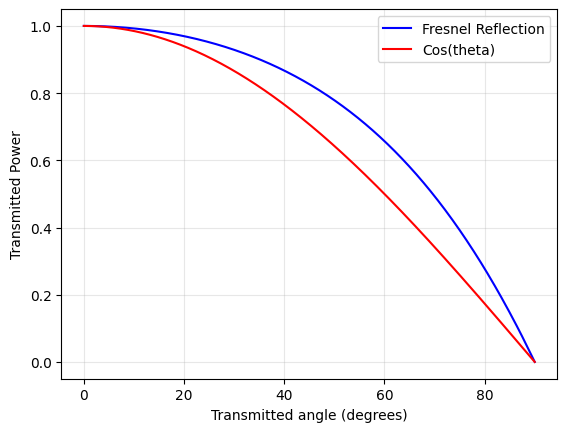

In [4]:
# --- Refractive indices ---
n1 = 3.3
n2 = 1.0

# --- Critical angle (inside n1) ---
theta_c = np.arcsin(n2 / n1)

# --- Incident angle grid (0 → TIR) ---
theta_i = np.linspace(0.0, theta_c, 1000)

sin_i = np.sin(theta_i)
cos_i = np.cos(theta_i)

# --- Snell's law ---
sin_t = (n1 / n2) * sin_i
theta_t = np.arcsin(sin_t)
cos_t = np.cos(theta_t)

theta_t_deg = np.degrees(theta_t)

# --- Fresnel s-polarized transmission ---
ts = (2.0 * n1 * cos_i) / (n1 * cos_i + n2 * cos_t)

Ts = (n2 * cos_t / (n1 * cos_i)) * ts**2

# --- Plot vs transmitted angle ---
plt.figure()
plt.plot(theta_t_deg, Ts/np.max(Ts),'b', label="Fresnel Reflection")
plt.plot(theta_t_deg, np.cos(theta_t),'r', label="Cos(theta)")
plt.xlabel("Transmitted angle (degrees)")
plt.ylabel("Transmitted Power")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Most LEDs have a lens encapsulation to adjust the light extraction.  

<img src="encapsulation.jpg" width="500">

Hemisphere encapsulation plastic increases the fraction of light that is extracted.  Let's look at normal incident light.

In [44]:
n1=3.3
n2=1.5
n3=1.0
T1=(4*n1*n3)/(n1+n3)**2
T2=(4*n1*n2)/(n1+n2)**2
T3=(4*n2*n3)/(n2+n3)**2
print ("With no encapsulation the normal transmission is ", np.round(T1, 2))
print ("With encapsulation the normal transmission has two tranmissions.")
print("If we ignore any double reflections")
print("The first transmission is ", np.round(T2, 2))
print("The second transmission is ", np.round(T3, 2))
print("The total transmission is ", np.round(T2*T3, 2))

With no encapsulation the normal transmission is  0.71
With encapsulation the normal transmission has two tranmissions.
If we ignore any double reflections
The first transmission is  0.86
The second transmission is  0.96
The total transmission is  0.82


By changing the position of the encapsulation and the shape of the encapsulation we can change the emission pattern. With a lens encapsulation a simple model for LED radiation patterns are given by
$$I(\theta)=I_o cos^n(\theta)$$

The higher the $n$ the more narrow the emission.

<div style="border:4px solid red">

**HW2:** An LED has a full width at half maximum of 30 degrees. With a emission function given by $I(\theta)=I_o cos^n(\theta)$, what is the value of $n$?  Use variable named hw2.  Plot the profile in both linear and polar form.

In [5]:
# FWHM is 30°, so the half-angle (15°) is where the intensity drops to half.
fwhm_deg = 30.0
theta_half = np.deg2rad(fwhm_deg / 2)
hw2 = np.log(0.5) / np.log(np.cos(theta_half))
print(f"The value of n is: {hw2:.2f}")

The value of n is: 19.99


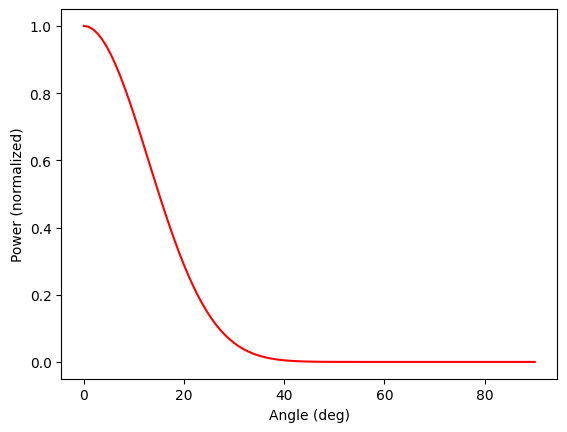

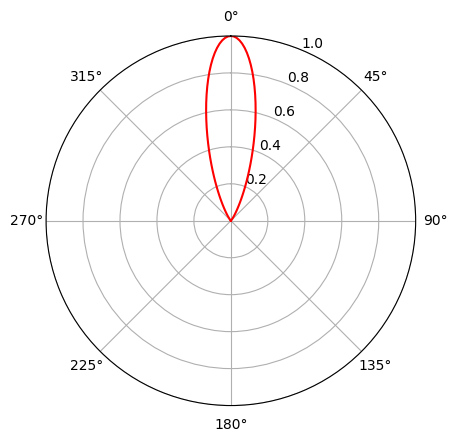

In [6]:
#plot the profile
theta=np.linspace(0,90, num=100)
I=(np.cos(np.deg2rad(theta)))**hw2
plt.plot(theta,I,'r')
plt.xlabel('Angle (deg)')
plt.ylabel('Power (normalized)')
plt.show()

ax = plt.subplot(111, projection="polar")
ax.plot(np.deg2rad(theta), I,'r')
ax.plot(np.deg2rad(-theta), I,'r')
ax.set_theta_zero_location("N")   # 0° at the top
ax.set_theta_direction(-1)        # clockwise angles
ax.set_rmax(1)
plt.show()


Now that we have an analytic angular spectrum $I=cos^{20}(\theta)$, we can relate intensity and power.  

<div style="border:4px solid red">

**HW3:** An LED has a normalized angular emission pattern given by $cos^{20}(\theta)$, a normalized power spectrum given by $\exp \left(-\frac{(\lambda - 628)^2}{107}\right)$, and a Luminous Power of $\Phi_v=5 \,lm$.  What is the Luminous Intensity in units of cd? Use variable named hw3.

**HELP:** 
Let the luminous intensity be

$$I(\theta) = I_0 \cos^{20}(\theta)$$

where $I_0$ is the on-axis luminous intensity (cd).

The total luminous power is

$$\Phi = \int I(\theta)\, d\Omega = \int_0^{2\pi}\int_0^{\pi/2} I_0 \cos^{20}(\theta) \sin\theta\, d\theta\, d\phi.$$

Separate the integrals:

$$\Phi = I_0 \left( \int_0^{2\pi} d\phi \right) \left( \int_0^{\pi/2} \cos^{20}(\theta) \sin\theta\, d\theta \right).$$

Evaluate the $\theta$-integral with $u = \cos \theta$, $du = -\sin\theta\, d\theta$; when $\theta = 0$, $u = 1$, and when $\theta = \pi/2$, $u = 0$:

$$\int_0^{\pi/2} \cos^{20}(\theta) \sin\theta\, d\theta = \int_1^0 u^{20} (-du) = \int_0^1 u^{20}\, du = \frac{1}{21}.$$

Thus,

$$\Phi = I_0 (2\pi) \left(\frac{1}{21}\right) = \frac{2\pi}{21} I_0.$$

Solving for $I_0$ gives

$$I_0 = \frac{21}{2\pi}\, \Phi.$$

So for $\Phi_v = 5\,\text{lm}$, the luminous intensity is

$$I_0 = \frac{21}{2\pi} \times 5\ \text{cd}.$$

In [8]:
# CODE here
I_0 = (21 / (2 * np.pi)) * 5

hw3 = I_0

print("Luminous intensity, I= ", np.round(hw3,2))

Luminous intensity, I=  16.71


As a rough estimate, we can treat the LED as a constant emission within the FWHM and zero outside. The FWHM is 30 degrees, so $\Omega=2\pi \left( 1-\frac{15*\pi}{180} \right)$ and $I=\frac{\Phi_v}{\Omega}$

In [9]:
I=5/(2*np.pi*(1-np.cos(np.deg2rad(15))))
print("Luminous intensity, I= ", np.round(I,2))

Luminous intensity, I=  23.35


<div style="border:4px solid red">

**HW4:** An LED has a normalized angular emission pattern given by $cos^{20}(\theta)$, a normalized power spectrum given by $\exp \left(-\frac{(\lambda - 628)^2}{107}\right)$, and a Luminous Intensity of $I_v=5000 \, mcd$.  What is luminous power of the LED in lumens?  Name the answer hw4.

$$I= \frac{d \Phi}{d \Omega}$$
$$d\Phi =I \, d \Omega$$
$$\Phi_v= \int I_v \, d\Omega$$
$$\Phi_v= \int d\phi \int I_v \, sin(\theta) d\theta$$


In [13]:
# Convert the given luminous intensity (in mcd) to candelas and integrate the angular pattern
I_v_mcd = 5000  # on-axis luminous intensity in milli-candela
I0 = I_v_mcd / 1000  # convert to candela

# Numerical integration over the upper hemisphere for I(theta) = I0 * cos^20(theta)
theta = np.linspace(0, np.pi / 2, 10_000)
I_theta = I0 * np.cos(theta) ** 20
integrand = I_theta * np.sin(theta)
dtheta = theta[1] - theta[0]
hw4 = 2 * np.pi * np.sum(integrand * dtheta)  # luminous power in lumens

# Closed-form result for reference: Phi = (2 * pi / 21) * I0
hw4_closed_form = (2 * np.pi / 21) * I0

print(f"Luminous power (numeric): {hw4:.3f} lm")
print(f"Luminous power (analytic): {hw4_closed_form:.3f} lm")

Luminous power (numeric): 1.496 lm
Luminous power (analytic): 1.496 lm


We now want to compute the Luminous Power numerically to check out numeric method.  The first step is to create the angular spectrum data file.  We will use spherical coordinates so we only need angles from 0 to 90 degrees.

In [14]:
theta = np.linspace(0, 90, num=100)  # polar angle (0 to 90 degrees)
I = (np.cos(np.deg2rad(theta)))**20  # intensity profile
#save the data
data = pd.DataFrame({"Angle": theta, "Intensity": I})
data.to_csv("LED_angle1.csv", index=False)

<div style="border:4px solid red">

**HW5:** An LED has an angular spectrum given in the file LED_angle1.csv and a Luminous Intensity of $I_v=5000 \, mcd$.  What is luminous power of the LED in lumens?  Name the answer hw5.

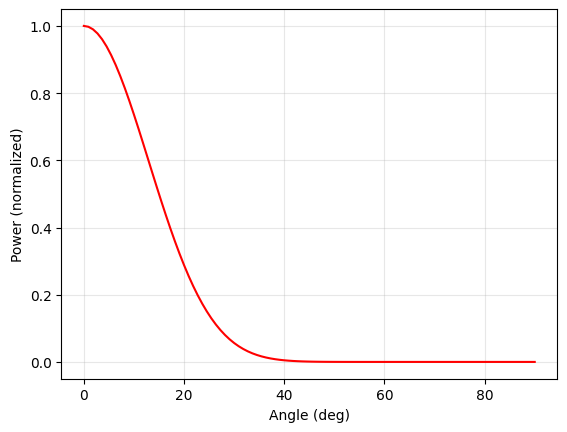

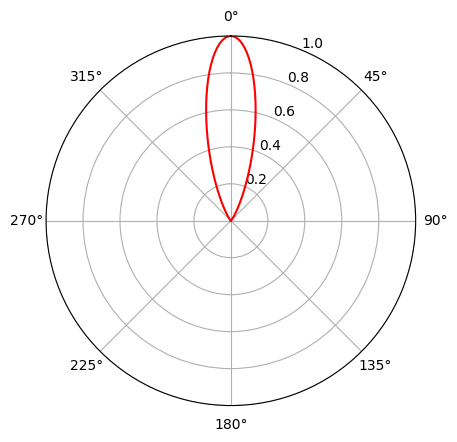

hw5 (luminous power) = 1.495 lm


In [17]:
# Read in the angular spectrum, visualize it, and compute luminous power
I_v_mcd = 5000  # on-axis luminous intensity from datasheet
I0 = I_v_mcd / 1000  # convert to candela

df = pd.read_csv("LED_angle1.csv")
theta_deg = df["Angle"].to_numpy()
intensity_norm = df["Intensity"].to_numpy()

plt.plot(theta_deg, intensity_norm, "r")
plt.xlabel("Angle (deg)")
plt.ylabel("Power (normalized)")
plt.grid(True, alpha=0.3)
plt.show()

ax = plt.subplot(111, projection="polar")
ax.plot(np.deg2rad(theta_deg), intensity_norm, "r")
ax.plot(-np.deg2rad(theta_deg), intensity_norm, "r")
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rmax(1)
plt.show()

# Discrete solid-angle integration over the upper hemisphere
theta_rad = np.deg2rad(theta_deg)
integrand = I0 * intensity_norm * np.sin(theta_rad)
dtheta = np.diff(theta_rad)
solid_angle_integral = np.sum(0.5 * (integrand[1:] + integrand[:-1]) * dtheta)
hw5 = 2 * np.pi * solid_angle_integral  # luminous power in lumens

print(f"hw5 (luminous power) = {hw5:.3f} lm")

We want to finish up our calculations by finding the radiant power.  This is similar to the previous homework assignment. If we look at the LED datasheet (see LED1.pdf), we can get the wavelength spectrum

<img src="LED1_spectrum.jpg" width="500">

We want to take this plot and create a data file for conversion between radiometric and photometric quantities. Here is the basic process: (1) Extract the data from the image.  (2) Clip the wavelength range to be from 590nm to 670 nm. (3) Fit the data to a Gaussian.  

The extracted data that we will use is LED1_spectrum.csv.

<div style="border:4px solid red">

**HW6:** An LED has a normalized power spectrum given in  LED1_spectrum.csv and a Luminous Power of $\Phi_v=1.5 \, lm$.  What is radiant power in units of W?  Name the answer hw6.

In [20]:
# Compute radiant power from the normalized spectrum and photopic response
Phi_v = 1.5  # luminous power in lumens
spec = pd.read_csv("LED1_spectrum.csv")
photopic = pd.read_csv("V.csv")

wavelength = spec["Wavelength"].to_numpy()
intensity = spec["Intensity"].to_numpy()
V_interp = np.interp(wavelength, photopic["Wavelength"], photopic["V_photopic"])

# Custom trapezoidal helper to avoid dependency on np.trapz
def trapz(y, x):
    return np.sum(0.5 * (y[1:] + y[:-1]) * (x[1:] - x[:-1]))

intensity_norm = intensity / trapz(intensity, wavelength)
luminous_efficiency = 683 * trapz(intensity_norm * V_interp, wavelength)

hw6 = Phi_v / luminous_efficiency
print(f"hw6 (radiant power) = {hw6:.6f} W")

hw6 (radiant power) = 0.007518 W


<div style="border:4px solid red">

**HW7:** Compute the radiant power for the red LED in LED1.pdf.  Use the typical value of Luminous Intesity of $I=5000 \, mcd$.   Name the answer hw7.

In [22]:
# HW7: Combine measured angular and spectral data to convert 5000 mcd into radiant watts
I_v_mcd = 5000  # luminous intensity from datasheet
I0 = I_v_mcd / 1000  # convert to candela

# --- Angular integration for luminous power ---
ang = pd.read_csv("LED_angular.csv", header=None, names=["Angle_deg", "Relative"])
theta_deg = np.abs(ang["Angle_deg"].to_numpy())
relative = ang["Relative"].to_numpy()
order = np.argsort(theta_deg)
theta_deg = theta_deg[order]
relative = relative[order]

# Add on-axis point if missing to stabilize integration
if theta_deg[0] > 1e-6:
    theta_deg = np.insert(theta_deg, 0, 0.0)
    relative = np.insert(relative, 0, relative.max())

intensity_norm = relative / relative.max()
theta_rad = np.deg2rad(theta_deg)
integrand = I0 * intensity_norm * np.sin(theta_rad)

def trapz(y, x):
    return np.sum(0.5 * (y[1:] + y[:-1]) * (x[1:] - x[:-1]))

Phi_v = 2 * np.pi * trapz(integrand, theta_rad)  # luminous power in lumens from measured pattern

# --- Spectral conversion to radiant power ---
spec = pd.read_csv("LED_spectrum.csv", header=None, names=["Wavelength", "RelativePower"])
spec_power = np.clip(spec["RelativePower"].to_numpy(), a_min=0.0, a_max=None)
wavelength = spec["Wavelength"].to_numpy()

photopic = pd.read_csv("V.csv")
V_interp = np.interp(wavelength, photopic["Wavelength"], photopic["V_photopic"])

spec_norm = spec_power / trapz(spec_power, wavelength)
luminous_efficiency = 683 * trapz(spec_norm * V_interp, wavelength)

hw7 = Phi_v / luminous_efficiency
print(f"Phi_v (from angular data) = {Phi_v:.3f} lm")
print(f"hw7 (radiant power) = {hw7:.6f} W")

Phi_v (from angular data) = 3.998 lm
hw7 (radiant power) = 0.021056 W


**Help:** Start with the angular spectrum plot. Here is the plot clipped out of the datasheet

<img src="LED_angular1.jpg" width="500">

Notice that this plot shows the data as a linear plot and a polar plot.  Create a data file for this plot.  Here is a good a data extraction website: https://automeris.io/

Here is the half plot.

<img src="LED_angular2.jpg" width="500">

You also need a data file for the wavelength.  Here is the plot clipped out of the datasheet

<img src="LED1_spectrum.jpg" width="500">

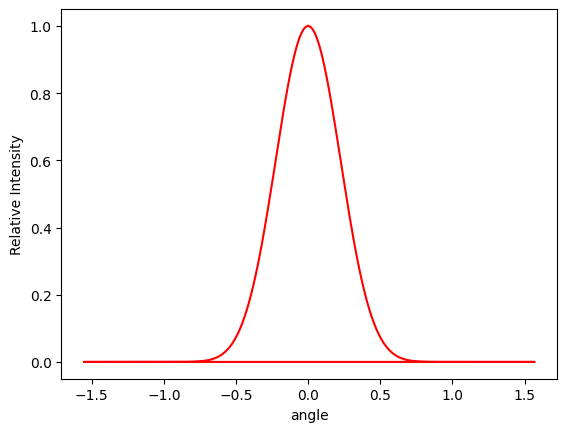

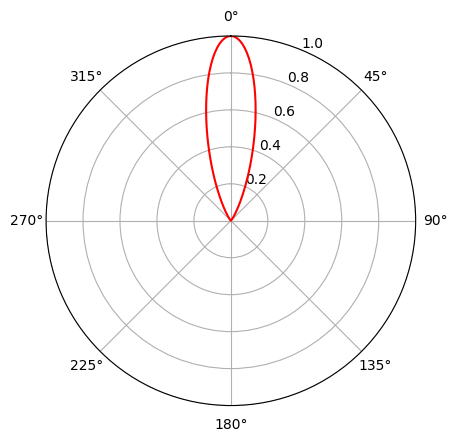